<a href="https://colab.research.google.com/github/Pyeonseohee/Deeplearning/blob/main/Deepnoid_Lecture04_YOLO_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter01. colab 환경 살펴보기

In [1]:
# import modules we need

import numpy as np
import tensorflow as tf
import os
from PIL import Image

In [2]:
print(tf.__version__)

2.4.1


colab에 파일을 업로드 해보자

In [3]:
from google.colab import files
uploaded = files.upload()

Saving sad.jpg to sad.jpg


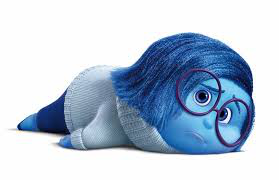

In [4]:
#저장된 이미지 이름을 불러와서 열어보자
Image.open('sad.jpg')

# Chapter02. Darknet 가져와서 실행만 시켜보기

Darknet이란? YOLO 논문의 저자 조셉 레드몬이 만든 프레임 워크로, cuda 기반의 오직 속도를 위해 저자가 개발한 프레임 워크

-> YOLO에서만 씀! 해당 프레임 워크를 알 필요는 없음

In [5]:
# 저자의 guthub에서 다크넷을 다운받기
!git clone https://github.com/pjreddie/darknet
# cd: change directory로 디렉토리를 바꿀 때 사용, 리눅스 명령어
%cd /content/darknet/
# make 파일 실행
!make

!ls -al darknet
# python 파일도 아니고 darknet 실행파일을 실행해보자!
!./darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5931, done.
remote: Total 5931 (delta 0), reused 0 (delta 0), pack-reused 5931
Receiving objects: 100% (5931/5931), 6.34 MiB | 31.85 MiB/s, done.
Resolving deltas: 100% (3922/3922), done.
/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.

In [6]:
# 모델파일을 들고오는데 성공했다. 그렇다면 미리 학습된 파라미터 혹은 weights 값도 다운받아 보자
# 먼저 모델의 파라미터가 들어갈 위치로 이동한 후
%cd /content/darknet/

# 저자가 공유한 파라미터 파일을 다운받도록 하자. 참고로 우리가 사용할 모델은 YOLO의 버전 3이다.
!wget wget https://pjreddie.com/media/files/yolov3.weights

/content/darknet
--2021-02-02 14:39:51--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2021-02-02 14:39:51--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  3.65MB/s    in 1m 46s  

2021-02-02 14:41:37 (2.23 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

FINISHED --2021-02-02 14:41:37--
Total wall clock time: 1m 46s
Downloaded: 1 files, 237M in 1m 46s (2.23 MB/s)


In [9]:
#pre-trained 된 모델을 가져와겠다, 실제로 모델로 inference(추론)를 해보도록 하자.
%cd /content/darknet
# Darknet에서 제공하는 예제 중 가장 유명한 강아지 사진을 가져와(data/dog.jpg) Object Detection을 해보도록 하자.
!./darknet detect cfg/yolov3.cfg.yolov3.weights data/dog.jpg

#이미지는 prediction.jpg라는 이름으로 저장된다. 해당 이미지를 주피터 노트북 환경에서 띄우기 위한 함수를 사용하면 yolo가 예측한 이미지를 볼 수 있다.
 from IPython.display import Image
 Image("predictions.jpg")

IndentationError: ignored

In [11]:
# 우리 데이터를 써서 inference를 해보자.
# 구글에서 적당한 거리뷰 이미지를 다운받아서 평가해 보자
%cd /content/darknet/data

#아래 코드를 실행하면 파일을 업로드 할 수 있는 UI가 나온다.
from google.colab import files
uploaded = files.upload()

/content/darknet/data


Saving view.png to view.png


In [13]:
# 업로드된 이미지를 yolov3를 통해 inference 해보자.
%cd /content/darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights ./data/sample3/jpg

from IPython.display import Image
Image("predictions.jpg")

/content/darknet
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8      

# Chapter3. tensorflow, keras로 구현된 YOLO 코드

이렇듯, DarkNet의 접근성 때문에 다크넷 코드를 케라스, 텐서플로우 등으로 변환하는 시도가 여럿이 있습니다.

그 중 한가지 예제를 들고와서 여러분께 소개시켜 드리고자 합니다.

In [14]:
# 먼저 보기 쉽도록 yolo
# 디렉토리를 만들고 그 안으로 이동합니다.

!mkdir yolo
%cd yolo
#github에 올라와있는 예제 코드를 다운받습니다.
!git clone https://github.com/zzh8829/yolov3-tf2.git
# 자동으로 생성된 디렉토리 안으로 들어갑니다.
%cd yolov3-tf2/
#wget 명령어는 리눅스 상에서 특정 웹에 있는 파일을 다운받을 때 주로 쓰입니다. 해당코드에서는 기존 제작사의 홈페이지에서 yolo v3 웨잇을 다운로드 받습니다.
!wget https://pjreddle.com/media/files/yolov3.weights -0 data/yolov3.weights
#github에 받는 코드중에 다크넷의 웨잇을 케라스, 텐서플로우로 바꿀 수 있는 코드가 convert.py로 주어집니다.
!python convert.py --weights ./data/yolov3.weights --output ./checkpoints/yolov3.tf

/content/darknet/yolo
Cloning into 'yolov3-tf2'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 400 (delta 1), reused 1 (delta 0), pack-reused 394
Receiving objects: 100% (400/400), 4.23 MiB | 38.64 MiB/s, done.
Resolving deltas: 100% (231/231), done.
/content/darknet/yolo/yolov3-tf2
wget: invalid option -- '0'
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.
2021-02-02 14:53:51.259959: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-02 14:53:53.415623: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-02-02 14:53:53.416859: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-02-02 14:53:53.482227: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successf

In [15]:
#Convert 가 끝났다면, 데이터 폴더에 들어있느 예제 meme.jpg 파을을 inference 해봅시다.
!python detect.py --image ./data/meme.jpg
from IPython.display import Image
Image("output.jpg")

2021-02-02 14:54:03.836796: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-02 14:54:05.406824: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-02-02 14:54:05.407663: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-02-02 14:54:05.438998: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-02-02 14:54:05.439529: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2021-02-02 14:54:05.439574: I tensorflow/stream_executor/platform/default/dso_loade

In [ ]:
#커스텀 데이터를 업로드 하여 inference 해 봅시다.먼저 data 디렉토리로 이동합니다.
%cd data
from google.colab import files
uploaded = files.upload()

!python detect.py --image ./data/####.jpg

/content/darknet/yolo/yolov3-tf2/data


#직접 Training해보자

computing power가 모자라서 안됩니다. 개인용 gpu혹은 서버가 있는 경우 시도해보세요.

In [ ]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar -O ./data/voc2012_raw.tar
!mkdir -p ./data/voc2012_raw
!tar -xf ./data/voc2012_raw.tar -C ./data/voc2012_raw
!ls ./data/voc2012_raw/VOCdevkit/VOC2012 # Explore the dataset

In [ ]:
!python tools/voc2012.py \
  --data_dir './data/voc2012_raw/VOCdevkit/VOC2012' \
  --split train \
  --output_file ./data/voc2012_train.tfrecord

!python tools/voc2012.py \
  --data_dir './data/voc2012_raw/VOCdevkit/VOC2012' \
  --split val \
  --output_file ./data/voc2012_val.tfrecord

In [ ]:
!python train.py \
	--dataset ./data/voc2012_train.tfrecord \
	--val_dataset ./data/voc2012_val.tfrecord \
	--classes ./data/voc2012.names \
	--num_classes 20 \
	--mode fit --transfer none \
	--batch_size 16 \
	--epochs 5 \

# Assignment

1) Inference your own custom data(image) for every 20 class and 5 non-class image Hard

2) Describe YOLOv3 network.(Darknet53) compare it with ResNet-101, 152 Challenging(Optional)

3) Design VGG19net and Darknet19 and compare its inference time